<a href="https://colab.research.google.com/github/Agungdecoco/Twitter-Sentiment-Analysis-in-Python/blob/main/Twitter_Sentiment_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Twitter Sentiment Analysis in Python**

https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [ ]:
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 4.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=d4d9d2cdacac7dc1f037db6d1d5c6eaa3524ccc458b879bcbdf81b63fed4c300
  Stored in directory: /root/.cache/pip/wheels/e2/aa/0f/c224e473b464387170b83ca7c66947b4a7e33e8d903a679748
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-n

In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
nltk.download('vader_lexicon')
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Authentication
consumerKey = 'T5UCLsVWODirHmak2A9ztKIj0'
consumerSecret = 'eiOLjGa0NNFyx34toW1G3Y26CAzrDyrlm32cbWMgrSfTXoVBta'
accessToken = '1312686470361092096-EcSOfgCGwGYOk21lg64jRAfkFqFfX2'
accessTokenSecret = 'uYSgCzF8e81kf7BoAAHqHvubmyWkVFZUHUpeFawM0m2zF'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=keyword, lang='en', until='2022-09-24').items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
#  print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
   negative_list.append(tweet.text)
   negative += 1
 elif pos > neg:
   positive_list.append(tweet.text)
   positive += 1
 elif pos == neg:
   neutral_list.append(tweet.text)
   neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: jokowi
Please enter how many tweets to analyze: 100


In [ ]:
tweet_list

[]

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  50
positive number:  12
negative number:  11
neutral number:  27


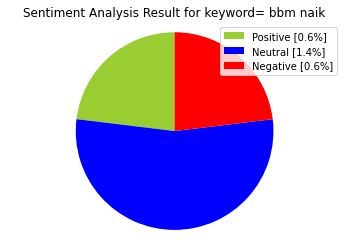

In [ ]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+'' )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
tweet_list

,0
0,@pulte can u help me 😔 just for transport krn ...
1,respect gfor the team! @minh85435669 @escobarp...
2,wl Outstanding @Yabai_bigwin @loloy_panalo @da...
3,@DailyPakistan I have a lot invested in ETH ❤️...
4,RT @penyembahmatcha: If some of you still ask ...
5,whitelist REPORT @oxtober__ @MenolakOx @0xknwi...
6,New video by Maell Lee: BBM NAIK https://t.co/...
7,RT @hydblooddonors: Sep21st\nPt name :Nehru na...
8,RT @elizabethlisa76: ANCAMAN HACKER\n\nBBM Nai...
9,wl COINS @yizhituzi2002 @prajapatimeena2 @wild...


In [ ]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ',' ',x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
# rt = lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split())
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@pulte can u help me 😔 just for transport krn ...,can u help me just for transport krn bbm naik
1,respect gfor the team! @minh85435669 @escobarp...,respect gfor the team dudhankar
2,wl Outstanding @Yabai_bigwin @loloy_panalo @da...,wl outstanding bigwin panalo naik ...
3,@DailyPakistan I have a lot invested in ETH ❤️...,i have a lot invested in eth nai...
4,RT @penyembahmatcha: If some of you still ask ...,if some of you still ask emang kenapa kalo b...
5,whitelist REPORT @oxtober__ @MenolakOx @0xknwi...,whitelist report naik sayang
6,New video by Maell Lee: BBM NAIK https://t.co/...,new video by maell lee bbm naik
7,RT @hydblooddonors: Sep21st\nPt name :Nehru na...,sep21st pt name nehru naik age 30 m diagno...
8,RT @elizabethlisa76: ANCAMAN HACKER\n\nBBM Nai...,ancaman hacker bbm naik naik bjorkanism to ...
9,wl COINS @yizhituzi2002 @prajapatimeena2 @wild...,wl coins


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
   tw_list.loc[index, 'sentiment'] = 'negative'
 elif pos > neg:
   tw_list.loc[index, 'sentiment'] = 'positive'
 else:
   tw_list.loc[index, 'sentiment'] = 'neutral'
   tw_list.loc[index, 'neg'] = neg
   tw_list.loc[index, 'neu'] = neu
   tw_list.loc[index, 'pos'] = pos
   tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@pulte can u help me 😔 just for transport krn ...,can u help me just for transport krn bbm naik,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
1,respect gfor the team! @minh85435669 @escobarp...,respect gfor the team dudhankar,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
2,wl Outstanding @Yabai_bigwin @loloy_panalo @da...,wl outstanding bigwin panalo naik ...,0.500000,0.875000,positive,NaN,NaN,NaN,NaN
3,@DailyPakistan I have a lot invested in ETH ❤️...,i have a lot invested in eth nai...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
4,RT @penyembahmatcha: If some of you still ask ...,if some of you still ask emang kenapa kalo b...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
5,whitelist REPORT @oxtober__ @MenolakOx @0xknwi...,whitelist report naik sayang,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
6,New video by Maell Lee: BBM NAIK https://t.co/...,new video by maell lee bbm naik,0.136364,0.454545,neutral,0.0,1.0,0.0,0.0
7,RT @hydblooddonors: Sep21st\nPt name :Nehru na...,sep21st pt name nehru naik age 30 m diagno...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
8,RT @elizabethlisa76: ANCAMAN HACKER\n\nBBM Nai...,ancaman hacker bbm naik naik bjorkanism to ...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
9,wl COINS @yizhituzi2002 @prajapatimeena2 @wild...,wl coins,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0


In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
neutral,27,64.29
positive,12,28.57
negative,3,7.14


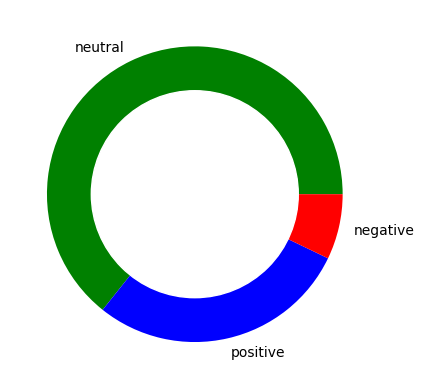

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,'sentiment')
names = pc.index
size = pc['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
 mask = np.array(Image.open('cloud.png'))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color='white', mask = mask, max_words=3000, stopwords=stopwords, repeat=True)
 wc.generate(str(text))
 wc.to_file('wc.png')
 print('Word Cloud Saved Successfully')
 path='wc.png'
 display(Image.open(path))

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list['text'].values)

In [ ]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,109.75
neutral,51.07
positive,66.92


In [ ]:
round(pd.DataFrame(tw_list.groupby('sentiment').text_word_count.mean()),2)

,text_word_count
sentiment,
negative,19.25
neutral,7.93
positive,10.23


In [ ]:
#Removing Punctuation
def remove_punct(text):
 text = ''.join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,@jokowi Bacot... 😂😂😂,bacot,0.0,0.0,neutral,0.0,1.0,0.0,0.0,14,1,bacot,"[, bacot, ]","[, bacot, ]","[, bacot, ]"
1,"@neverhatesunday @memefess Damn, jokowi got th...",damn jokowi got the drip,0.0,0.0,negative,NaN,NaN,NaN,NaN,30,5,damn jokowi got the drip,"[, damn, jokowi, got, the, drip, ]","[, damn, jokowi, got, drip, ]","[, damn, jokowi, got, drip, ]"
2,Food Insecurity Experience Scale (FIES) = Indi...,food insecurity experience scale fies indi...,0.0,0.4,negative,NaN,NaN,NaN,NaN,70,8,food insecurity experience scale fies indi...,"[food, insecurity, experience, scale, fies, in...","[food, insecurity, experience, scale, fies, in...","[food, insecur, experi, scale, fie, individu, ..."
3,So Jokowi's term is almost up. He cant run for...,so jokowi s term is almost up he cant run for...,0.5,0.5,neutral,0.0,1.0,0.0,0.0,105,23,so jokowi s term is almost up he cant run for...,"[so, jokowi, s, term, is, almost, up, he, cant...","[jokowi, term, almost, cant, run, el, presiden...","[jokowi, term, almost, cant, run, el, presiden..."
4,RT @AbdHali59646742: @LOVE_AG4EVER__ @jokowi T...,ag4ever the best pranker,1.0,0.3,positive,NaN,NaN,NaN,NaN,33,4,ag4ever the best pranker,"[, ag4ever, the, best, pranker, ]","[, ag4ever, best, pranker, ]","[, ag4ev, best, pranker, ]"


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))

#print(countVectorizer.get_feature_names())
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

1328 Number of reviews has 1828 words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aaakksdkwcnbdyjakkyeenrbcqxxccgr,aamiin,ab,abal,abang,abl,abroad,absenc,absent,...,yo,yong,york,youu,yup,zachmultimediagovernanceinsight,zaman,zmaaq,zon,zone
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
haramain,280
mention,266
dataakuratdaridesa,265
sdgsdesa,265
ke,244
jokowi,224
amp,178
share,147
hello,147
presid,146
